Data Training:
Input X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Target y: [0 1 1 1]

Parameter Awal:
Weights: [ 0.49671415 -0.1382643 ]
Bias: 0.6477

Memulai Training...
Epoch   0 | Loss: 0.5497
Epoch  10 | Loss: 0.2891
Epoch  20 | Loss: 0.1909
Epoch  30 | Loss: 0.1403
Epoch  40 | Loss: 0.1101
Epoch  50 | Loss: 0.0902
Epoch  60 | Loss: 0.0762
Epoch  70 | Loss: 0.0659
Epoch  80 | Loss: 0.0580
Epoch  90 | Loss: 0.0517
Training selesai!

Hasil Evaluasi:
Weights akhir: [5.41316931 5.43793218]
Bias akhir: -2.1944

Hasil Prediksi:
X1  X2  | Target | Prediksi | Probability
----------------------------------------
0   0   |    0    |     0    |    0.1003
0   1   |    1    |     1    |    0.9624
1   0   |    1    |     1    |    0.9615
1   1   |    1    |     1    |    0.9998


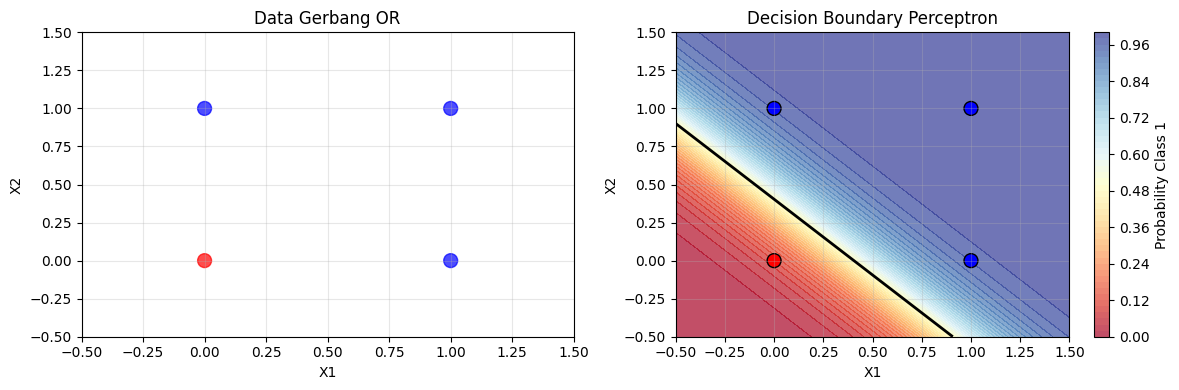

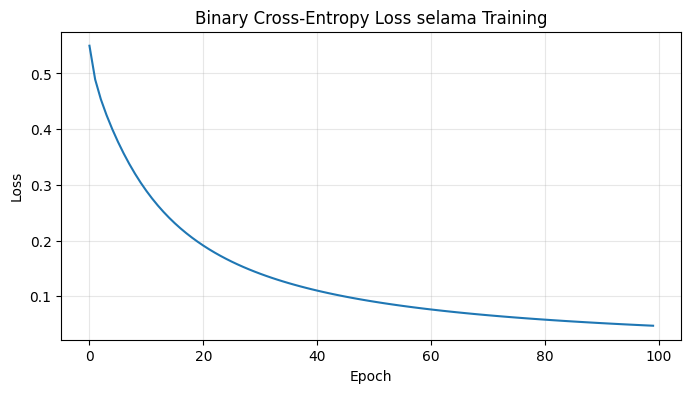


Test dengan Input Baru:
Input: [0.2, 0.3] → Probability: 0.6271 → Prediksi: 1
Input: [0.8, 0.1] → Probability: 0.9358 → Prediksi: 1
Input: [0.4, 0.9] → Probability: 0.9923 → Prediksi: 1
Input: [0.7, 0.8] → Probability: 0.9974 → Prediksi: 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# 1. DATA PREPARATION
# ======================

# Data training: Gerbang OR
# Format: [x1, x2, target]
X = np.array([
    [0, 0],  # Input 1
    [0, 1],  # Input 2  
    [1, 0],  # Input 3
    [1, 1]   # Input 4
])
y = np.array([0, 1, 1, 1])  # Target output OR gate

print("Data Training:")
print("Input X:")
print(X)
print("Target y:", y)
print()

# ======================
# 2. INISIALISASI PARAMETER
# ======================

# Inisialisasi weights dan bias secara random
np.random.seed(42)  # Untuk hasil yang konsisten
w = np.random.randn(2)  # 2 weights untuk 2 input
b = np.random.randn()   # 1 bias

print("Parameter Awal:")
print(f"Weights: {w}")
print(f"Bias: {b:.4f}")
print()

# Hyperparameter
learning_rate = 0.5
epochs = 100

# ======================
# 3. FUNGSI AKTIVASI SIGMOID
# ======================

def sigmoid(x):
    """
    Fungsi sigmoid mengubah input menjadi range 0-1
    Formula: 1 / (1 + e^(-x))
    """
    return 1 / (1 + np.exp(-x))

# ======================
# 4. FUNGSI LOSS BINARY CROSS-ENTROPY
# ======================

def binary_cross_entropy(y_true, y_pred):
    """
    Menghitung loss Binary Cross-Entropy
    Formula: -[y*log(ŷ) + (1-y)*log(1-ŷ)]
    """
    # Clip prediksi untuk menghindari log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# ======================
# 5. TRAINING LOOP
# ======================

print("Memulai Training...")
print("=" * 50)

loss_history = []

for epoch in range(epochs):
    total_loss = 0
    
    # Iterasi melalui semua data training
    for i in range(len(X)):
        # ======================
        # FORWARD PASS
        # ======================
        
        # Ambil input dan target
        x_i = X[i]      # Input features [x1, x2]
        y_true = y[i]   # True label
        
        # Hitung weighted sum: z = w·x + b
        z = np.dot(w, x_i) + b
        
        # Hitung prediksi dengan sigmoid: ŷ = σ(z)
        y_pred = sigmoid(z)
        
        # Hitung loss untuk data ini
        loss = binary_cross_entropy(y_true, y_pred)
        total_loss += loss
        
        # ======================
        # BACKWARD PASS (GRADIEN)
        # ======================
        
        # Gradien Binary Cross-Entropy: ∂L/∂ŷ = ŷ - y
        dL_dy_pred = y_pred - y_true
        
        # Gradien terhadap weights: ∂L/∂w = (ŷ - y) * x
        dL_dw = dL_dy_pred * x_i
        
        # Gradien terhadap bias: ∂L/∂b = (ŷ - y)
        dL_db = dL_dy_pred
        
        # ======================
        # UPDATE PARAMETER
        # ======================
        
        # Update weights: w = w - α * ∂L/∂w
        w = w - learning_rate * dL_dw
        
        # Update bias: b = b - α * ∂L/∂b  
        b = b - learning_rate * dL_db
    
    # Hitung rata-rata loss per epoch
    avg_loss = total_loss / len(X)
    loss_history.append(avg_loss)
    
    # Print progress setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} | Loss: {avg_loss:.4f}")

print("Training selesai!")
print()

# ======================
# 6. EVALUASI MODEL
# ======================

print("Hasil Evaluasi:")
print("=" * 50)

print(f"Weights akhir: {w}")
print(f"Bias akhir: {b:.4f}")
print()

# Test model dengan data training
print("Hasil Prediksi:")
print("X1  X2  | Target | Prediksi | Probability")
print("-" * 40)

for i in range(len(X)):
    x_i = X[i]
    y_true = y[i]
    
    # Forward pass dengan parameter akhir
    z = np.dot(w, x_i) + b
    y_prob = sigmoid(z)
    y_pred = 1 if y_prob >= 0.5 else 0
    
    print(f"{x_i[0]}   {x_i[1]}   |    {y_true}    |     {y_pred}    |    {y_prob:.4f}")

# ======================
# 7. VISUALISASI DECISION BOUNDARY
# ======================

# Buat grid points untuk plot decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), 
                     np.linspace(-0.5, 1.5, 100))

# Hitung z untuk setiap point di grid
Z = sigmoid(w[0] * xx + w[1] * yy + b)

# Plot
plt.figure(figsize=(12, 4))

# Plot 1: Data points
plt.subplot(1, 2, 1)
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Gerbang OR')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Plot 2: Decision Boundary
plt.subplot(1, 2, 2)
contour = plt.contourf(xx, yy, Z, levels=50, alpha=0.7, cmap='RdYlBu')
plt.colorbar(contour, label='Probability Class 1')
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Perceptron')
plt.grid(True, alpha=0.3)

# Plot decision boundary line (where probability = 0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

plt.tight_layout()
plt.show()

# ======================
# 8. PLOT LOSS HISTORY
# ======================

plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Cross-Entropy Loss selama Training')
plt.grid(True, alpha=0.3)
plt.show()

# ======================
# 9. TEST DENGAN INPUT BARU
# ======================

print("\nTest dengan Input Baru:")
print("=" * 30)

test_inputs = [
    [0.2, 0.3],
    [0.8, 0.1], 
    [0.4, 0.9],
    [0.7, 0.8]
]

for test in test_inputs:
    z_test = np.dot(w, test) + b
    y_prob_test = sigmoid(z_test)
    y_pred_test = 1 if y_prob_test >= 0.5 else 0
    
    print(f"Input: {test} → Probability: {y_prob_test:.4f} → Prediksi: {y_pred_test}")

Data Training GERBANG AND:
Input X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Target y: [0 0 0 1]
Keterangan: Output = 1 HANYA jika kedua input = 1

Parameter Awal:
Weights: [ 0.49671415 -0.1382643 ]
Bias: 0.6477

Memulai Training Gerbang AND...
Epoch   0 | Loss: 0.9580 | Weights: [0.492, -0.100] | Bias: 0.042
Epoch  10 | Loss: 0.4096 | Weights: [1.511, 1.220] | Bias: -2.002
Epoch  20 | Loss: 0.2781 | Weights: [2.177, 1.988] | Bias: -3.094
Epoch  30 | Loss: 0.2118 | Weights: [2.663, 2.521] | Bias: -3.885
Epoch  40 | Loss: 0.1712 | Weights: [3.051, 2.936] | Bias: -4.510
Epoch  50 | Loss: 0.1436 | Weights: [3.375, 3.278] | Bias: -5.028
Epoch  60 | Loss: 0.1237 | Weights: [3.655, 3.571] | Bias: -5.472
Epoch  70 | Loss: 0.1085 | Weights: [3.901, 3.826] | Bias: -5.859
Epoch  80 | Loss: 0.0967 | Weights: [4.120, 4.053] | Bias: -6.204
Epoch  90 | Loss: 0.0871 | Weights: [4.318, 4.258] | Bias: -6.514
Training selesai!

Hasil Evaluasi Gerbang AND:
Weights akhir: [4.4812, 4.4255]
Bias akhir: -6.7681

Hasil P

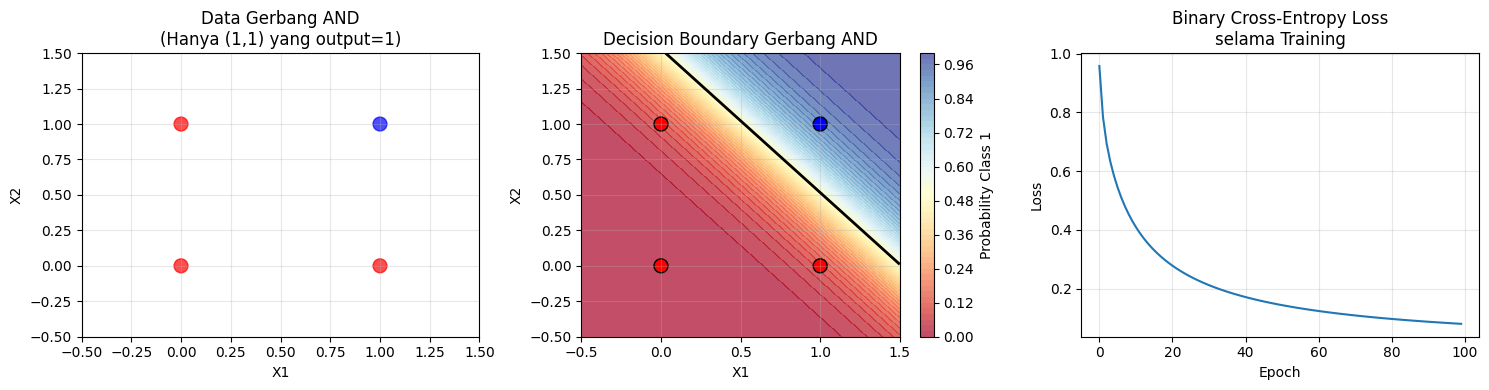


PERBANDINGAN GERBANG OR vs GERBANG AND

Tabel Kebenaran OR:
X1  X2  | Output
0   0   |   0
0   1   |   1
1   0   |   1
1   1   |   1

Tabel Kebenaran AND:
X1  X2  | Output
0   0   |   0
0   1   |   0
1   0   |   0
1   1   |   1

Perbedaan Pola:
- OR: Output 1 jika SETIDAKNYA SATU input = 1
- AND: Output 1 hanya jika KEDUA input = 1

Test dengan Input Baru Gerbang AND:
Input    | Probability | Prediksi | Keterangan
--------------------------------------------------
[0.2, 0.3] | 0.0105     | 0        | Salah satu/both kecil → AND = 0
[0.8, 0.1] | 0.0606     | 0        | Salah satu/both kecil → AND = 0
[0.4, 0.9] | 0.2704     | 0        | Salah satu/both kecil → AND = 0
[0.7, 0.8] | 0.4773     | 0        | Kedua input besar → AND = 1
[0.9, 0.9] | 0.7769     | 1        | Kedua input besar → AND = 1


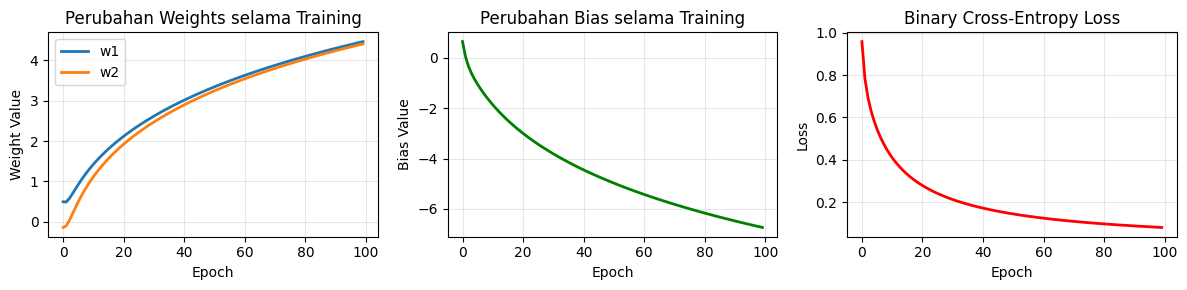

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# 1. DATA PREPARATION - GERBANG AND
# ======================

# Data training: Gerbang AND
# Format: [x1, x2, target]
X = np.array([
    [0, 0],  # 0 AND 0 = 0
    [0, 1],  # 0 AND 1 = 0  
    [1, 0],  # 1 AND 0 = 0
    [1, 1]   # 1 AND 1 = 1
])
y = np.array([0, 0, 0, 1])  # Target output AND gate

print("Data Training GERBANG AND:")
print("Input X:")
print(X)
print("Target y:", y)
print("Keterangan: Output = 1 HANYA jika kedua input = 1")
print()

# ======================
# 2. INISIALISASI PARAMETER
# ======================

# Inisialisasi weights dan bias secara random
np.random.seed(42)
w = np.random.randn(2)  # 2 weights untuk 2 input
b = np.random.randn()   # 1 bias

print("Parameter Awal:")
print(f"Weights: {w}")
print(f"Bias: {b:.4f}")
print()

# Hyperparameter
learning_rate = 0.5
epochs = 100

# ======================
# 3. FUNGSI AKTIVASI SIGMOID
# ======================

def sigmoid(x):
    """Fungsi sigmoid mengubah input menjadi probability 0-1"""
    return 1 / (1 + np.exp(-x))

# ======================
# 4. FUNGSI LOSS BINARY CROSS-ENTROPY
# ======================

def binary_cross_entropy(y_true, y_pred):
    """Menghitung Binary Cross-Entropy Loss"""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# ======================
# 5. TRAINING LOOP
# ======================

print("Memulai Training Gerbang AND...")
print("=" * 50)

loss_history = []
weight_history = []  # Untuk melacak perubahan weights
bias_history = []    # Untuk melacak perubahan bias

for epoch in range(epochs):
    total_loss = 0
    
    # Simpan parameter setiap epoch untuk analisis
    weight_history.append(w.copy())
    bias_history.append(b)
    
    # Iterasi melalui semua data training
    for i in range(len(X)):
        # FORWARD PASS
        x_i = X[i]
        y_true = y[i]
        
        z = np.dot(w, x_i) + b           # Weighted sum
        y_pred = sigmoid(z)              # Prediksi probability
        loss = binary_cross_entropy(y_true, y_pred)
        total_loss += loss
        
        # BACKWARD PASS
        dL_dy_pred = y_pred - y_true     # Gradien loss terhadap prediksi
        dL_dw = dL_dy_pred * x_i         # Gradien terhadap weights
        dL_db = dL_dy_pred               # Gradien terhadap bias
        
        # UPDATE PARAMETER
        w = w - learning_rate * dL_dw
        b = b - learning_rate * dL_db
    
    avg_loss = total_loss / len(X)
    loss_history.append(avg_loss)
    
    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} | Loss: {avg_loss:.4f} | Weights: [{w[0]:.3f}, {w[1]:.3f}] | Bias: {b:.3f}")

print("Training selesai!")
print()

# ======================
# 6. EVALUASI MODEL
# ======================

print("Hasil Evaluasi Gerbang AND:")
print("=" * 50)

print(f"Weights akhir: [{w[0]:.4f}, {w[1]:.4f}]")
print(f"Bias akhir: {b:.4f}")
print()

# Test model dengan data training
print("Hasil Prediksi Gerbang AND:")
print("X1  X2  | Target | Prediksi | Probability | Keterangan")
print("-" * 55)

for i in range(len(X)):
    x_i = X[i]
    y_true = y[i]
    
    z = np.dot(w, x_i) + b
    y_prob = sigmoid(z)
    y_pred = 1 if y_prob >= 0.5 else 0
    
    # Tambahkan keterangan logika
    logic_desc = f"{x_i[0]} AND {x_i[1]} = {y_true}"
    
    print(f"{x_i[0]}   {x_i[1]}   |    {y_true}    |     {y_pred}    |    {y_prob:.4f}    | {logic_desc}")

# ======================
# 7. ANALISIS DECISION BOUNDARY
# ======================

print("\nAnalisis Decision Boundary:")
print("=" * 40)

# Decision boundary: w1*x1 + w2*x2 + b = 0
# Untuk x2: x2 = (-w1*x1 - b) / w2

print(f"Persamaan Decision Boundary: {w[0]:.3f}*x1 + {w[1]:.3f}*x2 + {b:.3f} = 0")

# Hitung beberapa titik di decision boundary
x1_points = np.array([0, 0.5, 1])
x2_points = (-w[0] * x1_points - b) / w[1]

print("Titik-titik di Decision Boundary:")
for i in range(len(x1_points)):
    print(f"  x1 = {x1_points[i]:.2f}, x2 = {x2_points[i]:.2f}")

# ======================
# 8. VISUALISASI
# ======================

# Buat grid untuk plot decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), 
                     np.linspace(-0.5, 1.5, 100))
Z = sigmoid(w[0] * xx + w[1] * yy + b)

# Plot komprehensif
plt.figure(figsize=(15, 4))

# Plot 1: Data points
plt.subplot(1, 3, 1)
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Gerbang AND\n(Hanya (1,1) yang output=1)')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Plot 2: Decision Boundary
plt.subplot(1, 3, 2)
contour = plt.contourf(xx, yy, Z, levels=50, alpha=0.7, cmap='RdYlBu')
plt.colorbar(contour, label='Probability Class 1')
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Gerbang AND')
plt.grid(True, alpha=0.3)

# Plot 3: Loss History
plt.subplot(1, 3, 3)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Cross-Entropy Loss\nselama Training')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======================
# 9. PERBANDINGAN DENGAN GERBANG OR
# ======================

print("\n" + "="*60)
print("PERBANDINGAN GERBANG OR vs GERBANG AND")
print("="*60)

print("\nTabel Kebenaran OR:")
print("X1  X2  | Output")
print("0   0   |   0")
print("0   1   |   1") 
print("1   0   |   1")
print("1   1   |   1")

print("\nTabel Kebenaran AND:")
print("X1  X2  | Output")
print("0   0   |   0")
print("0   1   |   0")
print("1   0   |   0") 
print("1   1   |   1")

print("\nPerbedaan Pola:")
print("- OR: Output 1 jika SETIDAKNYA SATU input = 1")
print("- AND: Output 1 hanya jika KEDUA input = 1")

# ======================
# 10. TEST DENGAN INPUT BARU
# ======================

print("\nTest dengan Input Baru Gerbang AND:")
print("=" * 40)

test_inputs = [
    [0.2, 0.3],  # Kedua kecil → 0
    [0.8, 0.1],  # Salah satu kecil → 0
    [0.4, 0.9],  # Salah satu kecil → 0  
    [0.7, 0.8],  # Kedua besar → 1
    [0.9, 0.9]   # Kedua besar → 1
]

print("Input    | Probability | Prediksi | Keterangan")
print("-" * 50)

for test in test_inputs:
    z_test = np.dot(w, test) + b
    y_prob_test = sigmoid(z_test)
    y_pred_test = 1 if y_prob_test >= 0.5 else 0
    
    # Analisis
    if test[0] > 0.5 and test[1] > 0.5:
        analysis = "Kedua input besar → AND = 1"
    else:
        analysis = "Salah satu/both kecil → AND = 0"
    
    print(f"{test} | {y_prob_test:.4f}     | {y_pred_test}        | {analysis}")

# ======================
# 11. VISUALISASI PERUBAHAN PARAMETER
# ======================

plt.figure(figsize=(12, 3))

# Plot perubahan weights
plt.subplot(1, 3, 1)
weight_history = np.array(weight_history)
plt.plot(weight_history[:, 0], label='w1', linewidth=2)
plt.plot(weight_history[:, 1], label='w2', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Perubahan Weights selama Training')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot perubahan bias
plt.subplot(1, 3, 2)
plt.plot(bias_history, linewidth=2, color='green')
plt.xlabel('Epoch')
plt.ylabel('Bias Value')
plt.title('Perubahan Bias selama Training')
plt.grid(True, alpha=0.3)

# Plot loss akhir
plt.subplot(1, 3, 3)
plt.plot(loss_history, linewidth=2, color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Cross-Entropy Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Data Training GERBANG AND:
Input X (Matrix):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Target y (Vector): [0 0 0 1]
Shape X: (4, 2), Shape y: (4,)

Parameter Awal:
Weights: [ 0.49671415 -0.1382643 ] (shape: (2,))
Bias: 0.6477

Memulai Training VECTORIZED...
Epoch   0 | Loss: 0.9452 | Weights: [0.435, -0.183] | Bias: 0.426
Epoch  10 | Loss: 0.5698 | Weights: [0.391, -0.064] | Bias: -0.696
Epoch  20 | Loss: 0.4812 | Weights: [0.632, 0.290] | Bias: -1.186
Epoch  30 | Loss: 0.4195 | Weights: [0.874, 0.614] | Bias: -1.558
Epoch  40 | Loss: 0.3732 | Weights: [1.090, 0.891] | Bias: -1.879
Epoch  50 | Loss: 0.3370 | Weights: [1.283, 1.129] | Bias: -2.167
Epoch  60 | Loss: 0.3079 | Weights: [1.459, 1.339] | Bias: -2.428
Epoch  70 | Loss: 0.2839 | Weights: [1.620, 1.526] | Bias: -2.668
Epoch  80 | Loss: 0.2637 | Weights: [1.769, 1.695] | Bias: -2.890
Epoch  90 | Loss: 0.2464 | Weights: [1.908, 1.849] | Bias: -3.096
Training VECTORIZED selesai!

Hasil Evaluasi (Vectorized):
Weights akhir: [2.0256, 1.9769]
Bia

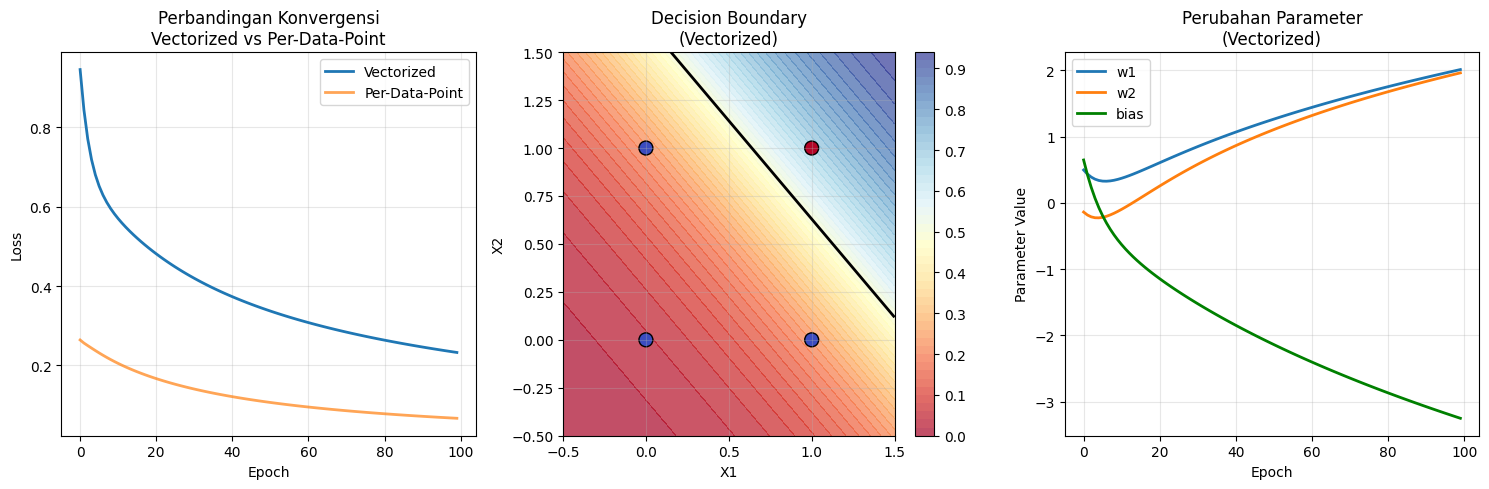


ANALISIS MATRIX OPERATIONS
1. FORWARD PASS:
   X shape: (4, 2)
   w shape: (2,)
   z = X @ w + b → shape: (4,)

2. BACKWARD PASS:
   dL_dy_pred = y_pred - y
   y_pred shape: (4,)
   y shape: (4,)
   dL_dy_pred shape: (4,)

3. GRADIEN WEIGHTS:
   dL_dw = X.T @ dL_dy_pred / n
   X.T shape: (2, 4)
   dL_dy_pred shape: (4,)
   dL_dw shape: (2,)

4. GRADIEN BIAS:
   dL_db = mean(dL_dy_pred)
   dL_db shape: Scalar

✅ KEUNTUNGAN VECTORIZED:
   - Hanya 1 forward/backward pass per epoch
   - Menggunakan optimized matrix operations
   - Lebih cepat (terutama untuk data besar)
   - Gradien lebih stabil (rata-rata semua data)


In [3]:
# 🚀 Versi Matrix Operation - Vectorized Implementation
import numpy as np
import matplotlib.pyplot as plt

# ======================
# 1. DATA PREPARATION - GERBANG AND
# ======================

# Data training: Gerbang AND (SAMA seperti sebelumnya)
X = np.array([
    [0, 0],  # 0 AND 0 = 0
    [0, 1],  # 0 AND 1 = 0  
    [1, 0],  # 1 AND 0 = 0
    [1, 1]   # 1 AND 1 = 1
])
y = np.array([0, 0, 0, 1])  # Target output AND gate

print("Data Training GERBANG AND:")
print("Input X (Matrix):")
print(X)
print("Target y (Vector):", y)
print(f"Shape X: {X.shape}, Shape y: {y.shape}")  # X: (4,2), y: (4,)
print()

# ======================
# 2. INISIALISASI PARAMETER  
# ======================

np.random.seed(42)
w = np.random.randn(2)  # Shape: (2,)
b = np.random.randn()   # Scalar

print("Parameter Awal:")
print(f"Weights: {w} (shape: {w.shape})")
print(f"Bias: {b:.4f}")
print()

# Hyperparameter
learning_rate = 0.5
epochs = 100

# ======================
# 3. FUNGSI AKTIVASI SIGMOID - VECTORIZED
# ======================

def sigmoid(x):
    """Fungsi sigmoid yang bekerja untuk scalar dan vector"""
    return 1 / (1 + np.exp(-x))

# ======================
# 4. TRAINING LOOP - VECTORIZED
# ======================

print("Memulai Training VECTORIZED...")
print("=" * 50)

loss_history = []
weight_history = []
bias_history = []

for epoch in range(epochs):
    # ======================
    # FORWARD PASS - SEMUA DATA SEKALIGUS!
    # ======================
    
    # z = X @ w + b  (Matrix multiplication)
    # X: (4,2), w: (2,) → z: (4,)
    z = np.dot(X, w) + b
    
    # ŷ = σ(z) untuk semua data
    y_pred = sigmoid(z)  # Shape: (4,)
    
    # Hitung loss rata-rata untuk semua data
    y_pred_clipped = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -np.mean(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
    
    loss_history.append(loss)
    weight_history.append(w.copy())
    bias_history.append(b)
    
    # ======================
    # BACKWARD PASS - GRADIEN UNTUK SEMUA DATA!
    # ======================
    
    # Gradien ∂L/∂ŷ untuk semua data: (ŷ - y)
    # y_pred: (4,), y: (4,) → dL_dy_pred: (4,)
    dL_dy_pred = y_pred - y  # Shape: (4,)
    
    # Gradien terhadap weights: X^T @ (ŷ - y) / n
    # X.T: (2,4), dL_dy_pred: (4,) → dL_dw: (2,)
    dL_dw = np.dot(X.T, dL_dy_pred) / len(X)  # Rata-rata gradien
    
    # Gradien terhadap bias: mean(ŷ - y)
    dL_db = np.mean(dL_dy_pred)  # Scalar
    
    # ======================
    # UPDATE PARAMETER - SEKALI SAJA!
    # ======================
    
    w = w - learning_rate * dL_dw
    b = b - learning_rate * dL_db
    
    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} | Loss: {loss:.4f} | Weights: [{w[0]:.3f}, {w[1]:.3f}] | Bias: {b:.3f}")

print("Training VECTORIZED selesai!")
print()

# ======================
# 5. EVALUASI MODEL
# ======================

print("Hasil Evaluasi (Vectorized):")
print("=" * 50)

print(f"Weights akhir: [{w[0]:.4f}, {w[1]:.4f}]")
print(f"Bias akhir: {b:.4f}")
print()

# Prediksi untuk semua data sekaligus
z_final = np.dot(X, w) + b
y_prob_final = sigmoid(z_final)
y_pred_final = (y_prob_final >= 0.5).astype(int)

print("Hasil Prediksi SEMUA DATA SEKALIGUS:")
print("X1  X2  | Target | Prediksi | Probability")
print("-" * 45)

for i in range(len(X)):
    print(f"{X[i,0]}   {X[i,1]}   |    {y[i]}    |     {y_pred_final[i]}    |    {y_prob_final[i]:.4f}")

# ======================
# 6. PERBANDINGAN: VECTORIZED vs PER-DATA-POINT
# ======================

print("\n" + "="*60)
print("PERBANDINGAN: VECTORIZED vs PER-DATA-POINT")
print("="*60)

# Implementasi per-data-point untuk perbandingan
def train_per_data_point(X, y, w, b, learning_rate, epochs):
    """Training dengan update per data point"""
    w_pt = w.copy()
    b_pt = b
    loss_history_pt = []
    
    for epoch in range(epochs):
        total_loss = 0
        # Iterasi per data point
        for i in range(len(X)):
            # Forward pass untuk satu data
            z_pt = np.dot(w_pt, X[i]) + b_pt
            y_pred_pt = sigmoid(z_pt)
            
            # Loss untuk satu data
            loss_pt = - (y[i] * np.log(y_pred_pt) + (1 - y[i]) * np.log(1 - y_pred_pt))
            total_loss += loss_pt
            
            # Backward pass untuk satu data
            dL_dy_pred_pt = y_pred_pt - y[i]
            dL_dw_pt = dL_dy_pred_pt * X[i]
            dL_db_pt = dL_dy_pred_pt
            
            # Update parameters
            w_pt = w_pt - learning_rate * dL_dw_pt
            b_pt = b_pt - learning_rate * dL_db_pt
        
        loss_history_pt.append(total_loss / len(X))
    
    return w_pt, b_pt, loss_history_pt

# Training per-data-point
w_pt, b_pt, loss_pt = train_per_data_point(X, y, w.copy(), b, learning_rate, epochs)

print("\nPerbandingan Hasil:")
print("Method           | Weights        | Bias     | Final Loss")
print("-" * 55)
print(f"Vectorized       | [{w[0]:.4f}, {w[1]:.4f}] | {b:.4f}  | {loss_history[-1]:.6f}")
print(f"Per-Data-Point   | [{w_pt[0]:.4f}, {w_pt[1]:.4f}] | {b_pt:.4f}  | {loss_pt[-1]:.6f}")

# ======================
# 7. VISUALISASI PERBANDINGAN
# ======================

plt.figure(figsize=(15, 5))

# Plot 1: Loss comparison
plt.subplot(1, 3, 1)
plt.plot(loss_history, label='Vectorized', linewidth=2)
plt.plot(loss_pt, label='Per-Data-Point', linewidth=2, alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Perbandingan Konvergensi\nVectorized vs Per-Data-Point')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Decision Boundary Vectorized
plt.subplot(1, 3, 2)
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = sigmoid(w[0] * xx + w[1] * yy + b)
contour = plt.contourf(xx, yy, Z, levels=50, alpha=0.7, cmap='RdYlBu')
plt.colorbar(contour)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='black', cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary\n(Vectorized)')
plt.grid(True, alpha=0.3)

# Plot 3: Parameter changes
plt.subplot(1, 3, 3)
weight_history = np.array(weight_history)
plt.plot(weight_history[:, 0], label='w1', linewidth=2)
plt.plot(weight_history[:, 1], label='w2', linewidth=2)
plt.plot(bias_history, label='bias', linewidth=2, color='green')
plt.xlabel('Epoch')
plt.ylabel('Parameter Value')
plt.title('Perubahan Parameter\n(Vectorized)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======================
# 8. ANALISIS MATRIX OPERATIONS
# ======================

print("\n" + "="*50)
print("ANALISIS MATRIX OPERATIONS")
print("="*50)

print("1. FORWARD PASS:")
print(f"   X shape: {X.shape}")      # (4, 2)
print(f"   w shape: {w.shape}")      # (2,)
print(f"   z = X @ w + b → shape: {z_final.shape}")  # (4,)

print("\n2. BACKWARD PASS:")
print("   dL_dy_pred = y_pred - y")
print(f"   y_pred shape: {y_pred.shape}")  # (4,)
print(f"   y shape: {y.shape}")            # (4,)
print(f"   dL_dy_pred shape: {dL_dy_pred.shape}")  # (4,)

print("\n3. GRADIEN WEIGHTS:")
print("   dL_dw = X.T @ dL_dy_pred / n")
print(f"   X.T shape: {X.T.shape}")              # (2, 4)
print(f"   dL_dy_pred shape: {dL_dy_pred.shape}") # (4,)
print(f"   dL_dw shape: {dL_dw.shape}")          # (2,)

print("\n4. GRADIEN BIAS:")
print("   dL_db = mean(dL_dy_pred)")
print(f"   dL_db shape: Scalar")

print("\n✅ KEUNTUNGAN VECTORIZED:")
print("   - Hanya 1 forward/backward pass per epoch")
print("   - Menggunakan optimized matrix operations")
print("   - Lebih cepat (terutama untuk data besar)")
print("   - Gradien lebih stabil (rata-rata semua data)")

In [ ]:
# 🎯 Perbedaan Fundamental:
# Versi Per-Data-Point:

for i in range(len(X)):
    # Hitung gradien untuk SATU data
    dL_dw = (ŷ_i - y_i) * x_i
    # Update weights SEKALI per data
    w = w - α * dL_dw

#Versi Vectorized:

# Hitung gradien untuk SEMUA data sekaligus
dL_dw = X.T @ (ŷ - y) / n  # Matrix operation!
# Update weights SEKALI per epoch  
w = w - α * dL_dw

# ⚡ Keuntungan Vectorized:
# Speed: Menggunakan optimized matrix operations (BLAS/LAPACK)

# Stability: Gradien dirata-ratakan dari semua data

# Simplicity: Code lebih bersih dan mudah dibaca

# Scalability: Mudah di-scale untuk data yang lebih besar

# Coba jalankan dan lihat bagaimana vectorized version lebih efisien! 🚀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# FUNGSI UMUM
# ======================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def train_perceptron(X, y, learning_rate=0.1, epochs=1000):
    """Fungsi training vectorized untuk 3 fitur"""
    n_samples, n_features = X.shape
    
    # Inisialisasi parameter
    w = np.random.randn(n_features)
    b = np.random.randn()
    
    loss_history = []
    weight_history = []
    
    print(f"Training untuk {n_samples} samples, {n_features} fitur")
    print(f"Shape X: {X.shape}, Shape y: {y.shape}")
    print(f"Parameter awal - w: {w}, b: {b:.4f}")
    print()
    
    for epoch in range(epochs):
        # ======================
        # FORWARD PASS - SEMUA DATA SEKALIGUS!
        # ======================
        
        # z = X @ w + b  (Matrix multiplication)
        # X: (n,3), w: (3,) → z: (n,)
        z = np.dot(X, w) + b
        
        # ŷ = σ(z) untuk semua data
        y_pred = sigmoid(z)  # Shape: (n,)
        
        # Hitung loss rata-rata untuk semua data
        loss = binary_cross_entropy(y, y_pred)
        loss_history.append(loss)
        weight_history.append(w.copy())
        
        # ======================
        # BACKWARD PASS - GRADIEN UNTUK SEMUA DATA!
        # ======================
        
        # Gradien ∂L/∂ŷ untuk semua data: (ŷ - y)
        dL_dy_pred = y_pred - y  # Shape: (n,)
        
        # Gradien terhadap weights: X^T @ (ŷ - y) / n
        dL_dw = np.dot(X.T, dL_dy_pred) / n_samples  # Shape: (3,)
        
        # Gradien terhadap bias: mean(ŷ - y)
        dL_db = np.mean(dL_dy_pred)  # Scalar
        
        # ======================
        # UPDATE PARAMETER - SEKALI SAJA!
        # ======================
        
        w = w - learning_rate * dL_dw
        b = b - learning_rate * dL_db
        
        if epoch % 200 == 0:
            accuracy = np.mean((y_pred >= 0.5).astype(int) == y)
            print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.3f}")
    
    # Prediksi akhir
    z_final = np.dot(X, w) + b
    y_pred_final = sigmoid(z_final)
    predictions = (y_pred_final >= 0.5).astype(int)
    final_accuracy = np.mean(predictions == y)
    
    print(f"\nHasil akhir - Accuracy: {final_accuracy:.3f}")
    print(f"Weights akhir: {w}")
    print(f"Bias akhir: {b:.4f}")
    
    return w, b, loss_history, weight_history, predictions

In [5]:
# =========================================
# CONTOH 1: GERBANG LOGIKA "3-INPUT OR"
# =========================================

print("=" * 60)
print("CONTOH 1: GERBANG LOGIKA 3-INPUT OR")
print("=" * 60)

# Data: Output = 1 jika minimal satu input = 1
X1 = np.array([
    [0, 0, 0],  # 0 OR 0 OR 0 = 0
    [0, 0, 1],  # 0 OR 0 OR 1 = 1
    [0, 1, 0],  # 0 OR 1 OR 0 = 1
    [0, 1, 1],  # 0 OR 1 OR 1 = 1
    [1, 0, 0],  # 1 OR 0 OR 0 = 1
    [1, 0, 1],  # 1 OR 0 OR 1 = 1
    [1, 1, 0],  # 1 OR 1 OR 0 = 1
    [1, 1, 1]   # 1 OR 1 OR 1 = 1
])
y1 = np.array([0, 1, 1, 1, 1, 1, 1, 1])

w1, b1, loss1, weights1, pred1 = train_perceptron(X1, y1, learning_rate=0.5, epochs=1000)

CONTOH 1: GERBANG LOGIKA 3-INPUT OR
Training untuk 8 samples, 3 fitur
Shape X: (8, 3), Shape y: (8,)
Parameter awal - w: [-1.4123037   1.46564877 -0.2257763 ], b: 0.0675

Epoch    0 | Loss: 0.8319 | Accuracy: 0.375
Epoch  200 | Loss: 0.1018 | Accuracy: 1.000
Epoch  400 | Loss: 0.0606 | Accuracy: 1.000
Epoch  600 | Loss: 0.0428 | Accuracy: 1.000
Epoch  800 | Loss: 0.0329 | Accuracy: 1.000

Hasil akhir - Accuracy: 1.000
Weights akhir: [5.49581777 5.53972905 5.50853476]
Bias akhir: -2.0819


In [ ]:
# =========================================
# CONTOH 2: GERBANG LOGIKA "MAJORITY VOTE"
# =========================================

print("\n" + "=" * 60)
print("CONTOH 2: MAJORITY VOTE (2 dari 3 harus 1)")
print("=" * 60)

# Data: Output = 1 jika minimal 2 input = 1
X2 = np.array([
    [0, 0, 0],  # 0 votes = 0
    [0, 0, 1],  # 1 vote  = 0
    [0, 1, 0],  # 1 vote  = 0
    [0, 1, 1],  # 2 votes = 1
    [1, 0, 0],  # 1 vote  = 0
    [1, 0, 1],  # 2 votes = 1
    [1, 1, 0],  # 2 votes = 1
    [1, 1, 1]   # 3 votes = 1
])
y2 = np.array([0, 0, 0, 1, 0, 1, 1, 1])

w2, b2, loss2, weights2, pred2 = train_perceptron(X2, y2, learning_rate=0.5, epochs=1000)

In [ ]:
# =========================================
# CONTOH 3: KELAS 1 JIKA JUMLAH FITUR > 1.5
# =========================================

print("\n" + "=" * 60)
print("CONTOH 3: JUMLAH FITUR > 1.5")
print("=" * 60)

# Data: Output = 1 jika jumlah ketiga fitur > 1.5
X3 = np.array([
    [0.2, 0.3, 0.1],  # sum = 0.6  → 0
    [0.8, 0.2, 0.3],  # sum = 1.3  → 0
    [0.5, 0.6, 0.4],  # sum = 1.5  → 0
    [0.7, 0.5, 0.6],  # sum = 1.8  → 1
    [0.9, 0.8, 0.1],  # sum = 1.8  → 1
    [0.3, 0.7, 0.9],  # sum = 1.9  → 1
    [1.0, 0.4, 0.8],  # sum = 2.2  → 1
    [0.6, 0.6, 0.6]   # sum = 1.8  → 1
])
y3 = np.array([0, 0, 0, 1, 1, 1, 1, 1])

w3, b3, loss3, weights3, pred3 = train_perceptron(X3, y3, learning_rate=0.5, epochs=1000)

In [ ]:
# =========================================
# CONTOH 4: KELAS 1 JIKA FITUR 1 DOMINAN
# =========================================

print("\n" + "=" * 60)
print("CONTOH 4: FITUR 1 > FITUR 2 + FITUR 3")
print("=" * 60)

# Data: Output = 1 jika fitur1 > (fitur2 + fitur3)
X4 = np.array([
    [0.3, 0.2, 0.1],  # 0.3 > 0.3? False → 0
    [0.4, 0.1, 0.1],  # 0.4 > 0.2? True  → 1
    [0.2, 0.3, 0.3],  # 0.2 > 0.6? False → 0
    [0.7, 0.2, 0.3],  # 0.7 > 0.5? True  → 1
    [0.5, 0.4, 0.2],  # 0.5 > 0.6? False → 0
    [0.8, 0.1, 0.2],  # 0.8 > 0.3? True  → 1
    [0.6, 0.5, 0.5],  # 0.6 > 1.0? False → 0
    [0.9, 0.3, 0.3]   # 0.9 > 0.6? True  → 1
])
y4 = np.array([0, 1, 0, 1, 0, 1, 0, 1])

w4, b4, loss4, weights4, pred4 = train_perceptron(X4, y4, learning_rate=0.5, epochs=1000)

CONTOH 1: GERBANG LOGIKA 3-INPUT OR
Training untuk 8 samples, 3 fitur
Shape X: (8, 3), Shape y: (8,)
Parameter awal - w: [ 1.52302986 -0.23415337 -0.23413696], b: 1.5792

Epoch    0 | Loss: 0.3423 | Accuracy: 0.875
Epoch  200 | Loss: 0.1060 | Accuracy: 1.000
Epoch  400 | Loss: 0.0623 | Accuracy: 1.000
Epoch  600 | Loss: 0.0437 | Accuracy: 1.000
Epoch  800 | Loss: 0.0334 | Accuracy: 1.000

Hasil akhir - Accuracy: 1.000
Weights akhir: [5.50806052 5.47726712 5.47726731]
Bias akhir: -2.0676

CONTOH 2: MAJORITY VOTE (2 dari 3 harus 1)
Training untuk 8 samples, 3 fitur
Shape X: (8, 3), Shape y: (8,)
Parameter awal - w: [ 0.76743473 -0.46947439  0.54256004], b: -0.4634

Epoch    0 | Loss: 0.6220 | Accuracy: 0.500
Epoch  200 | Loss: 0.1601 | Accuracy: 1.000
Epoch  400 | Loss: 0.0952 | Accuracy: 1.000
Epoch  600 | Loss: 0.0673 | Accuracy: 1.000
Epoch  800 | Loss: 0.0518 | Accuracy: 1.000

Hasil akhir - Accuracy: 1.000
Weights akhir: [5.73267272 5.73267096 5.73267244]
Bias akhir: -8.4463

CONTOH

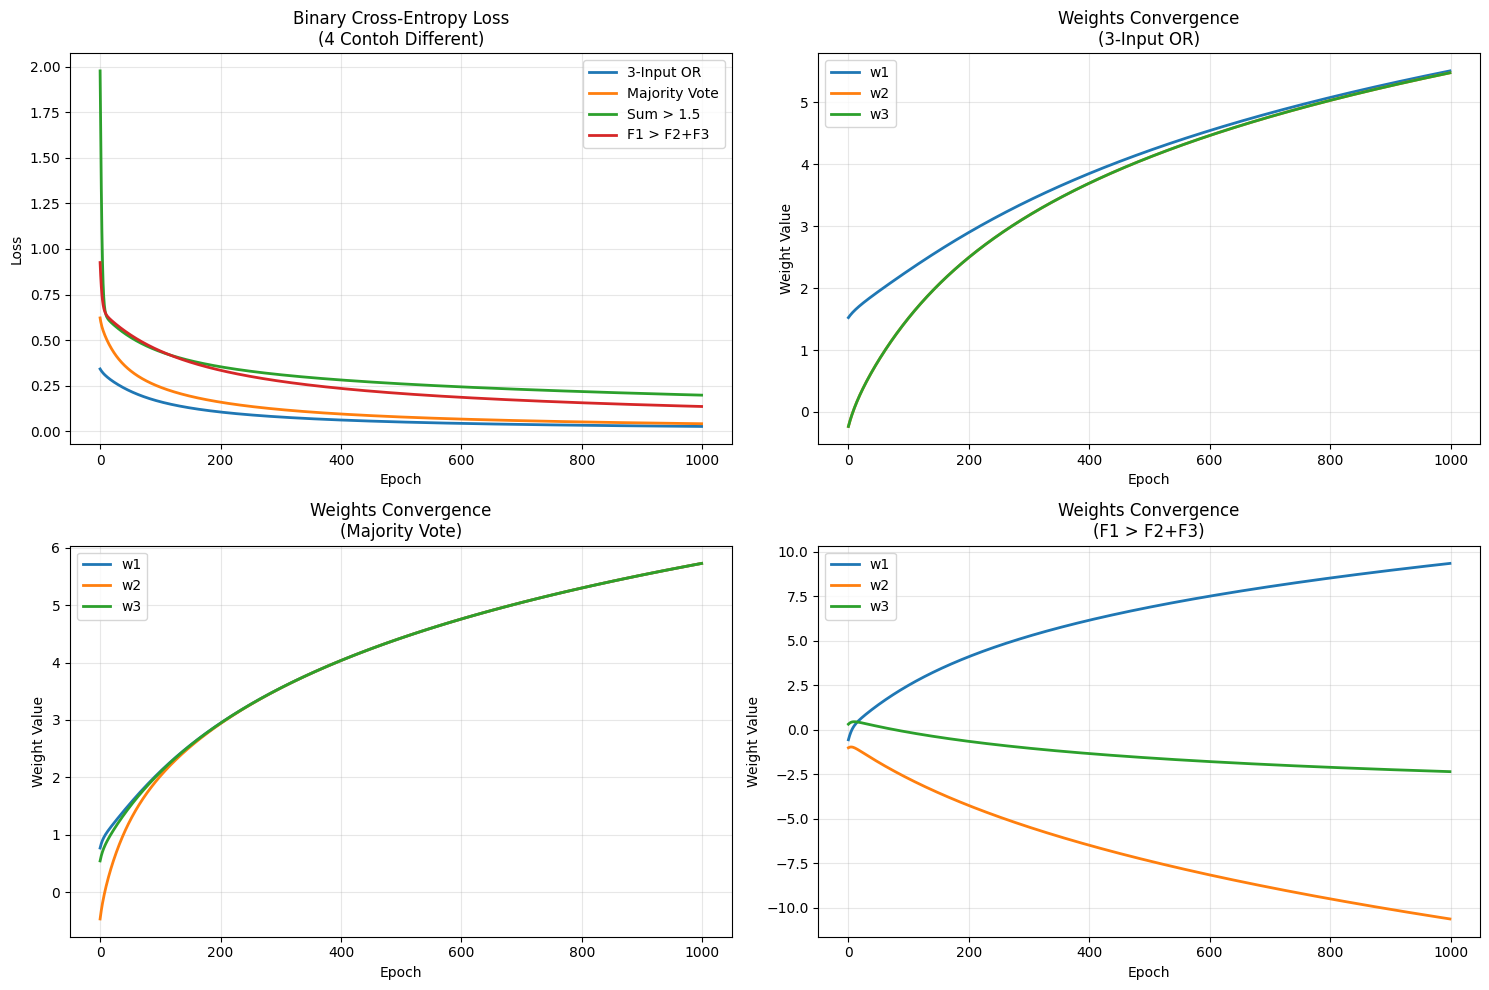


ANALISIS DETAIL MATRIX OPERATIONS UNTUK CONTOH 1
Demo Forward Pass untuk Epoch 1:
X shape: (8, 3)
w shape: (3,)
y shape: (8,)

z = X @ w + b
z shape: (8,)
z values: [-2.06759932 -2.30173628 -2.30175269 -2.53588965 -0.54456946 -0.77870642
 -0.77872284 -1.01285979]

ŷ = σ(z)
ŷ shape: (8,)
ŷ values: [0.11228611 0.09097927 0.09097791 0.07338017 0.36712525 0.31459875
 0.31459521 0.26642056]

Target y: [0 1 1 1 1 1 1 1]

∂L/∂ŷ = ŷ - y
∂L/∂ŷ shape: (8,)
∂L/∂ŷ values: [ 0.11228611 -0.90902073 -0.90902209 -0.92661983 -0.63287475 -0.68540125
 -0.68540479 -0.73357944]

∂L/∂w = X.T @ (ŷ - y) / n
X.T shape: (3, 8)
∂L/∂w shape: (3,)
∂L/∂w values: [-0.34215753 -0.40682827 -0.40682766]

∂L/∂b = mean(ŷ - y)
∂L/∂b value: -0.671205

INTERPRETASI WEIGHTS FINAL
1. 3-INPUT OR:
   Weights: [5.50806052 5.47726712 5.47726731]
   Interpretasi: Semua weights positif → semua fitur berkontribusi positif
   Pola: Output 1 jika minimal satu input = 1

2. MAJORITY VOTE:
   Weights: [5.73267272 5.73267096 5.73267244]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# FUNGSI UMUM
# ======================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def train_perceptron(X, y, learning_rate=0.1, epochs=1000):
    """Fungsi training vectorized untuk 3 fitur"""
    n_samples, n_features = X.shape
    
    # Inisialisasi parameter
    w = np.random.randn(n_features)
    b = np.random.randn()
    
    loss_history = []
    weight_history = []
    
    print(f"Training untuk {n_samples} samples, {n_features} fitur")
    print(f"Shape X: {X.shape}, Shape y: {y.shape}")
    print(f"Parameter awal - w: {w}, b: {b:.4f}")
    print()
    
    for epoch in range(epochs):
        # ======================
        # FORWARD PASS - SEMUA DATA SEKALIGUS!
        # ======================
        
        # z = X @ w + b  (Matrix multiplication)
        # X: (n,3), w: (3,) → z: (n,)
        z = np.dot(X, w) + b
        
        # ŷ = σ(z) untuk semua data
        y_pred = sigmoid(z)  # Shape: (n,)
        
        # Hitung loss rata-rata untuk semua data
        loss = binary_cross_entropy(y, y_pred)
        loss_history.append(loss)
        weight_history.append(w.copy())
        
        # ======================
        # BACKWARD PASS - GRADIEN UNTUK SEMUA DATA!
        # ======================
        
        # Gradien ∂L/∂ŷ untuk semua data: (ŷ - y)
        dL_dy_pred = y_pred - y  # Shape: (n,)
        
        # Gradien terhadap weights: X^T @ (ŷ - y) / n
        dL_dw = np.dot(X.T, dL_dy_pred) / n_samples  # Shape: (3,)
        
        # Gradien terhadap bias: mean(ŷ - y)
        dL_db = np.mean(dL_dy_pred)  # Scalar
        
        # ======================
        # UPDATE PARAMETER - SEKALI SAJA!
        # ======================
        
        w = w - learning_rate * dL_dw
        b = b - learning_rate * dL_db
        
        if epoch % 200 == 0:
            accuracy = np.mean((y_pred >= 0.5).astype(int) == y)
            print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.3f}")
    
    # Prediksi akhir
    z_final = np.dot(X, w) + b
    y_pred_final = sigmoid(z_final)
    predictions = (y_pred_final >= 0.5).astype(int)
    final_accuracy = np.mean(predictions == y)
    
    print(f"\nHasil akhir - Accuracy: {final_accuracy:.3f}")
    print(f"Weights akhir: {w}")
    print(f"Bias akhir: {b:.4f}")
    
    return w, b, loss_history, weight_history, predictions

# =========================================
# CONTOH 1: GERBANG LOGIKA "3-INPUT OR"
# =========================================

print("=" * 60)
print("CONTOH 1: GERBANG LOGIKA 3-INPUT OR")
print("=" * 60)

# Data: Output = 1 jika minimal satu input = 1
X1 = np.array([
    [0, 0, 0],  # 0 OR 0 OR 0 = 0
    [0, 0, 1],  # 0 OR 0 OR 1 = 1
    [0, 1, 0],  # 0 OR 1 OR 0 = 1
    [0, 1, 1],  # 0 OR 1 OR 1 = 1
    [1, 0, 0],  # 1 OR 0 OR 0 = 1
    [1, 0, 1],  # 1 OR 0 OR 1 = 1
    [1, 1, 0],  # 1 OR 1 OR 0 = 1
    [1, 1, 1]   # 1 OR 1 OR 1 = 1
])
y1 = np.array([0, 1, 1, 1, 1, 1, 1, 1])

w1, b1, loss1, weights1, pred1 = train_perceptron(X1, y1, learning_rate=0.5, epochs=1000)

# =========================================
# CONTOH 2: GERBANG LOGIKA "MAJORITY VOTE"
# =========================================

print("\n" + "=" * 60)
print("CONTOH 2: MAJORITY VOTE (2 dari 3 harus 1)")
print("=" * 60)

# Data: Output = 1 jika minimal 2 input = 1
X2 = np.array([
    [0, 0, 0],  # 0 votes = 0
    [0, 0, 1],  # 1 vote  = 0
    [0, 1, 0],  # 1 vote  = 0
    [0, 1, 1],  # 2 votes = 1
    [1, 0, 0],  # 1 vote  = 0
    [1, 0, 1],  # 2 votes = 1
    [1, 1, 0],  # 2 votes = 1
    [1, 1, 1]   # 3 votes = 1
])
y2 = np.array([0, 0, 0, 1, 0, 1, 1, 1])

w2, b2, loss2, weights2, pred2 = train_perceptron(X2, y2, learning_rate=0.5, epochs=1000)

# =========================================
# CONTOH 3: KELAS 1 JIKA JUMLAH FITUR > 1.5
# =========================================

print("\n" + "=" * 60)
print("CONTOH 3: JUMLAH FITUR > 1.5")
print("=" * 60)

# Data: Output = 1 jika jumlah ketiga fitur > 1.5
X3 = np.array([
    [0.2, 0.3, 0.1],  # sum = 0.6  → 0
    [0.8, 0.2, 0.3],  # sum = 1.3  → 0
    [0.5, 0.6, 0.4],  # sum = 1.5  → 0
    [0.7, 0.5, 0.6],  # sum = 1.8  → 1
    [0.9, 0.8, 0.1],  # sum = 1.8  → 1
    [0.3, 0.7, 0.9],  # sum = 1.9  → 1
    [1.0, 0.4, 0.8],  # sum = 2.2  → 1
    [0.6, 0.6, 0.6]   # sum = 1.8  → 1
])
y3 = np.array([0, 0, 0, 1, 1, 1, 1, 1])

w3, b3, loss3, weights3, pred3 = train_perceptron(X3, y3, learning_rate=0.5, epochs=1000)

# =========================================
# CONTOH 4: KELAS 1 JIKA FITUR 1 DOMINAN
# =========================================

print("\n" + "=" * 60)
print("CONTOH 4: FITUR 1 > FITUR 2 + FITUR 3")
print("=" * 60)

# Data: Output = 1 jika fitur1 > (fitur2 + fitur3)
X4 = np.array([
    [0.3, 0.2, 0.1],  # 0.3 > 0.3? False → 0
    [0.4, 0.1, 0.1],  # 0.4 > 0.2? True  → 1
    [0.2, 0.3, 0.3],  # 0.2 > 0.6? False → 0
    [0.7, 0.2, 0.3],  # 0.7 > 0.5? True  → 1
    [0.5, 0.4, 0.2],  # 0.5 > 0.6? False → 0
    [0.8, 0.1, 0.2],  # 0.8 > 0.3? True  → 1
    [0.6, 0.5, 0.5],  # 0.6 > 1.0? False → 0
    [0.9, 0.3, 0.3]   # 0.9 > 0.6? True  → 1
])
y4 = np.array([0, 1, 0, 1, 0, 1, 0, 1])

w4, b4, loss4, weights4, pred4 = train_perceptron(X4, y4, learning_rate=0.5, epochs=1000)

# =========================================
# VISUALISASI HASIL
# =========================================

plt.figure(figsize=(15, 10))

# Plot loss histories
plt.subplot(2, 2, 1)
plt.plot(loss1, label='3-Input OR', linewidth=2)
plt.plot(loss2, label='Majority Vote', linewidth=2)
plt.plot(loss3, label='Sum > 1.5', linewidth=2)
plt.plot(loss4, label='F1 > F2+F3', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Cross-Entropy Loss\n(4 Contoh Different)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot weights convergence untuk Contoh 1
plt.subplot(2, 2, 2)
weights1_array = np.array(weights1)
plt.plot(weights1_array[:, 0], label='w1', linewidth=2)
plt.plot(weights1_array[:, 1], label='w2', linewidth=2)
plt.plot(weights1_array[:, 2], label='w3', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weights Convergence\n(3-Input OR)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot weights convergence untuk Contoh 2
plt.subplot(2, 2, 3)
weights2_array = np.array(weights2)
plt.plot(weights2_array[:, 0], label='w1', linewidth=2)
plt.plot(weights2_array[:, 1], label='w2', linewidth=2)
plt.plot(weights2_array[:, 2], label='w3', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weights Convergence\n(Majority Vote)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot weights convergence untuk Contoh 4
plt.subplot(2, 2, 4)
weights4_array = np.array(weights4)
plt.plot(weights4_array[:, 0], label='w1', linewidth=2)
plt.plot(weights4_array[:, 1], label='w2', linewidth=2)
plt.plot(weights4_array[:, 2], label='w3', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weights Convergence\n(F1 > F2+F3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================
# ANALISIS DETAIL MATRIX OPERATIONS
# =========================================

print("\n" + "=" * 60)
print("ANALISIS DETAIL MATRIX OPERATIONS UNTUK CONTOH 1")
print("=" * 60)

# Demo forward pass untuk epoch pertama Contoh 1
print("Demo Forward Pass untuk Epoch 1:")
print(f"X shape: {X1.shape}")  # (8, 3)
print(f"w shape: {weights1[0].shape}")  # (3,)
print(f"y shape: {y1.shape}")  # (8,)

# Simulasi satu forward pass
z_demo = np.dot(X1, weights1[0]) + b1
print(f"\nz = X @ w + b")
print(f"z shape: {z_demo.shape}")  # (8,)
print(f"z values: {z_demo}")

y_pred_demo = sigmoid(z_demo)
print(f"\nŷ = σ(z)")
print(f"ŷ shape: {y_pred_demo.shape}")  # (8,)
print(f"ŷ values: {y_pred_demo}")

print(f"\nTarget y: {y1}")

# Demo backward pass
dL_dy_pred_demo = y_pred_demo - y1
print(f"\n∂L/∂ŷ = ŷ - y")
print(f"∂L/∂ŷ shape: {dL_dy_pred_demo.shape}")  # (8,)
print(f"∂L/∂ŷ values: {dL_dy_pred_demo}")

dL_dw_demo = np.dot(X1.T, dL_dy_pred_demo) / len(X1)
print(f"\n∂L/∂w = X.T @ (ŷ - y) / n")
print(f"X.T shape: {X1.T.shape}")  # (3, 8)
print(f"∂L/∂w shape: {dL_dw_demo.shape}")  # (3,)
print(f"∂L/∂w values: {dL_dw_demo}")

dL_db_demo = np.mean(dL_dy_pred_demo)
print(f"\n∂L/∂b = mean(ŷ - y)")
print(f"∂L/∂b value: {dL_db_demo:.6f}")

# =========================================
# INTERPRETASI WEIGHTS FINAL
# =========================================

print("\n" + "=" * 60)
print("INTERPRETASI WEIGHTS FINAL")
print("=" * 60)

print("1. 3-INPUT OR:")
print(f"   Weights: {w1}")
print("   Interpretasi: Semua weights positif → semua fitur berkontribusi positif")
print("   Pola: Output 1 jika minimal satu input = 1")

print("\n2. MAJORITY VOTE:")
print(f"   Weights: {w2}")
print("   Interpretasi: Weights seimbang → butuh kombinasi fitur")
print("   Pola: Output 1 jika minimal 2 input = 1")

print("\n3. SUM > 1.5:")
print(f"   Weights: {w3}")
print("   Interpretasi: Weights positif dan seimbang → memperhatikan jumlah total")
print("   Pola: Output 1 jika jumlah ketiga fitur > 1.5")

print("\n4. F1 > F2+F3:")
print(f"   Weights: {w4}")
print("   Interpretasi: w1 positif, w2 & w3 negatif → mendukung fitur1, menekan fitur2 & 3")
print("   Pola: Output 1 jika fitur1 > (fitur2 + fitur3)")

🎓 CONTOH 1: PREDIKSI LULUS UJIAN
DATA SISWA:
No | Belajar | Hadir | Tugas | Lulus?
----------------------------------------
 1 |     2 jam |  60%  |  50   | TIDAK 👎
 2 |     5 jam |  80%  |  70   | TIDAK 👎
 3 |     8 jam |  90%  |  85   | YA 👍
 4 |    10 jam |  95%  |  90   | YA 👍
 5 |     1 jam |  50%  |  40   | TIDAK 👎
 6 |     7 jam |  85%  |  80   | YA 👍
 7 |     3 jam |  70%  |  60   | TIDAK 👎
 8 |     9 jam |  92%  |  88   | YA 👍

🔧 MEMULAI TRAINING...
Parameter awal: w = [-1.42474819 -0.54438272  0.11092259], b = -1.15
Epoch    0 | Loss: 3.4544 | Accuracy: 50.0%
Epoch  200 | Loss: 0.0010 | Accuracy: 100.0%
Epoch  400 | Loss: 0.0012 | Accuracy: 100.0%
Epoch  600 | Loss: 0.0012 | Accuracy: 100.0%
Epoch  800 | Loss: 0.0012 | Accuracy: 100.0%

✅ TRAINING SELESAI!
Weights akhir: [8.329, -10.696, 11.575]
Bias akhir: -2.149

🔮 HASIL PREDIKSI:
No | Belajar | Hadir | Tugas | Aktual | Prediksi | Probability
-----------------------------------------------------------------
 1 |     2 jam |

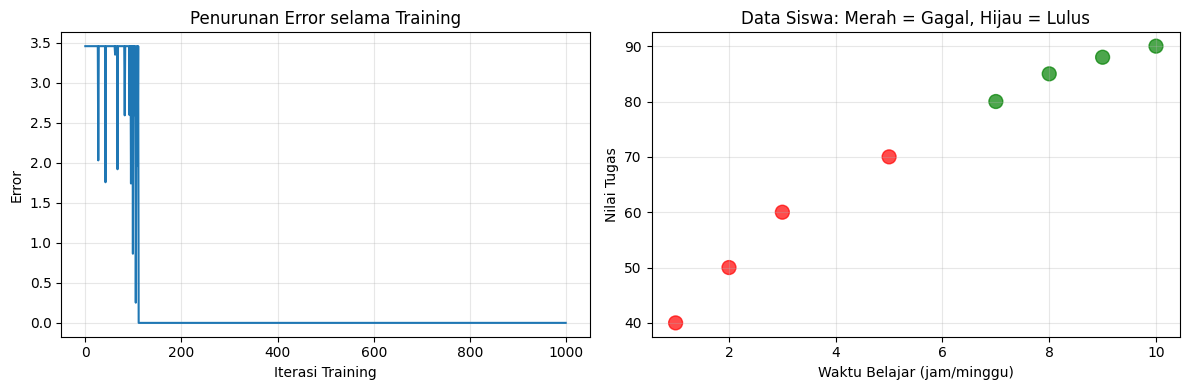


📊 INTERPRETASI MODEL:
• Weight Belajar: 8.329 → Setiap jam belajar meningkatkan kemungkinan lulus
• Weight Kehadiran: -10.696 → Setiap % kehadiran meningkatkan kemungkinan lulus
• Weight Tugas: 11.575 → Setiap point nilai tugas meningkatkan kemungkinan lulus
• Bias: -2.149 → Kemungkinan dasar tanpa mempertimbangkan fitur

🎯 RUMUS PREDIKSI:
Skor = (8.329 × Belajar) + (-10.696 × Hadir) + (11.575 × Tugas) + (-2.149)
Probability = 1 / (1 + e^(-Skor))
Prediksi Lulus jika Probability ≥ 0.5


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# DATA: PREDIKSI KELULUSAN SISWA
# ======================

print("🎓 CONTOH 1: PREDIKSI LULUS UJIAN")
print("=" * 50)

# Fitur: [Waktu Belajar (jam/minggu), Kehadiran (%), Nilai Tugas (0-100)]
X = np.array([
    [2, 60, 50],   # Siswa A: belajar sedikit, jarang masuk, nilai rendah
    [5, 80, 70],   # Siswa B: belajar cukup, hadir, nilai cukup
    [8, 90, 85],   # Siswa C: rajin belajar, hadir, nilai bagus
    [10, 95, 90],  # Siswa D: sangat rajin, selalu hadir, nilai excellent
    [1, 50, 40],   # Siswa E: malas, bolos, nilai jelek
    [7, 85, 80],   # Siswa F: rajin, hadir, nilai bagus
    [3, 70, 60],   # Siswa G: biasa saja
    [9, 92, 88]    # Siswa H: excellent
])

# Target: 1 = Lulus, 0 = Tidak Lulus
y = np.array([0, 0, 1, 1, 0, 1, 0, 1])

print("DATA SISWA:")
print("No | Belajar | Hadir | Tugas | Lulus?")
print("-" * 40)
for i in range(len(X)):
    status = "YA 👍" if y[i] == 1 else "TIDAK 👎"
    print(f"{i+1:2} | {X[i,0]:5} jam | {X[i,1]:3}%  | {X[i,2]:3}   | {status}")

# ======================
# FUNGSI SEDERHANA
# ======================

def sigmoid(x):
    """Fungsi untuk mengubah angka menjadi probability (0-1)"""
    return 1 / (1 + np.exp(-x))

def train_model(X, y, learning_rate=0.1, epochs=1000):
    """Training model sederhana"""
    
    # Inisialisasi parameter random
    w = np.random.randn(3)  # 3 weights untuk 3 fitur
    b = np.random.randn()   # bias
    
    print(f"\n🔧 MEMULAI TRAINING...")
    print(f"Parameter awal: w = {w}, b = {b:.2f}")
    
    loss_history = []
    
    for epoch in range(epochs):
        # === FORWARD PASS ===
        z = np.dot(X, w) + b           # Hitung skor
        y_pred = sigmoid(z)            # Ubah ke probability
        y_pred = np.clip(y_pred, 0.001, 0.999)  # Hindari log(0)
        
        # Hitung error
        loss = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        loss_history.append(loss)
        
        # === BACKWARD PASS ===
        error = y_pred - y             # Selisih prediksi vs aktual
        dL_dw = np.dot(X.T, error) / len(X)  # Gradien weights
        dL_db = np.mean(error)         # Gradien bias
        
        # === UPDATE PARAMETER ===
        w = w - learning_rate * dL_dw
        b = b - learning_rate * dL_db
        
        if epoch % 200 == 0:
            accuracy = np.mean((y_pred >= 0.5).astype(int) == y)
            print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.1%}")
    
    return w, b, loss_history

# ======================
# TRAINING MODEL
# ======================

w, b, loss_history = train_model(X, y)

print(f"\n✅ TRAINING SELESAI!")
print(f"Weights akhir: [{w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}]")
print(f"Bias akhir: {b:.3f}")

# ======================
# PREDIKSI
# ======================

print("\n🔮 HASIL PREDIKSI:")
print("No | Belajar | Hadir | Tugas | Aktual | Prediksi | Probability")
print("-" * 65)

for i in range(len(X)):
    z = np.dot(X[i], w) + b
    prob = sigmoid(z)
    pred = "LULUS 👍" if prob >= 0.5 else "GAGAL 👎"
    actual = "LULUS" if y[i] == 1 else "GAGAL"
    
    print(f"{i+1:2} | {X[i,0]:5} jam | {X[i,1]:3}%  | {X[i,2]:3}   | {actual:6} | {pred:9} | {prob:.1%}")

# ======================
# TEST SISWA BARU
# ======================

print("\n🎯 PREDIKSI SISWA BARU:")
test_students = [
    [6, 75, 65],   # Siswa I: cukup rajin
    [4, 85, 75],   # Siswa J: hadir bagus
    [12, 98, 95],  # Siswa K: superstar
    [0, 30, 20]    # Siswa L: sangat malas
]

print("Belajar | Hadir | Tugas | Prediksi | Kemungkinan")
print("-" * 50)

for student in test_students:
    z = np.dot(student, w) + b
    prob = sigmoid(z)
    pred = "LULUS 👍" if prob >= 0.5 else "GAGAL 👎"
    
    print(f"{student[0]:4} jam | {student[1]:3}%  | {student[2]:3}   | {pred:9} | {prob:.1%}")

# ======================
# VISUALISASI
# ======================

plt.figure(figsize=(12, 4))

# Plot 1: Loss selama training
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Iterasi Training')
plt.ylabel('Error')
plt.title('Penurunan Error selama Training')
plt.grid(True, alpha=0.3)

# Plot 2: Data points
plt.subplot(1, 2, 2)
colors = ['red' if label == 0 else 'green' for label in y]
plt.scatter(X[:, 0], X[:, 2], c=colors, s=100, alpha=0.7)
plt.xlabel('Waktu Belajar (jam/minggu)')
plt.ylabel('Nilai Tugas')
plt.title('Data Siswa: Merah = Gagal, Hijau = Lulus')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======================
# INTERPRETASI MODEL
# ======================

print("\n📊 INTERPRETASI MODEL:")
print(f"• Weight Belajar: {w[0]:.3f} → Setiap jam belajar meningkatkan kemungkinan lulus")
print(f"• Weight Kehadiran: {w[1]:.3f} → Setiap % kehadiran meningkatkan kemungkinan lulus")  
print(f"• Weight Tugas: {w[2]:.3f} → Setiap point nilai tugas meningkatkan kemungkinan lulus")
print(f"• Bias: {b:.3f} → Kemungkinan dasar tanpa mempertimbangkan fitur")

print("\n🎯 RUMUS PREDIKSI:")
print(f"Skor = ({w[0]:.3f} × Belajar) + ({w[1]:.3f} × Hadir) + ({w[2]:.3f} × Tugas) + ({b:.3f})")
print("Probability = 1 / (1 + e^(-Skor))")
print("Prediksi Lulus jika Probability ≥ 0.5")

In [7]:
# ======================
# DATA: PREDIKSI SAKIT FLU
# ======================

print("\n" + "🤧" * 25)
print("CONTOH 2: PREDIKSI SAKIT FLU")
print("🤧" * 25)

# Fitur: [Suhu Badan (°C), Jam Tidur, Stress Level (1-10)]
X_flu = np.array([
    [36.5, 8, 2],   # Sehat: suhu normal, tidur cukup, stress rendah
    [37.8, 5, 7],   # Sakit: demam, kurang tidur, stress tinggi  
    [36.8, 7, 3],   # Sehat
    [38.2, 4, 8],   # Sakit
    [36.3, 9, 1],   # Sehat
    [37.5, 6, 6],   # Sakit
    [36.7, 8, 2],   # Sehat
    [38.0, 5, 9]    # Sakit
])

# Target: 1 = Sakit Flu, 0 = Sehat
y_flu = np.array([0, 1, 0, 1, 0, 1, 0, 1])

print("DATA KESEHATAN:")
print("No | Suhu | Tidur | Stress | Flu?")
print("-" * 35)
for i in range(len(X_flu)):
    status = "YA 🤒" if y_flu[i] == 1 else "TIDAK 😊"
    print(f"{i+1:2} | {X_flu[i,0]:4}°C | {X_flu[i,1]:3} jam | {X_flu[i,2]:4}   | {status}")

# Training model flu
w_flu, b_flu, loss_flu = train_model(X_flu, y_flu)

print(f"\n🔬 MODEL FLU:")
print(f"Weights: [{w_flu[0]:.3f}, {w_flu[1]:.3f}, {w_flu[2]:.3f}]")
print(f"Bias: {b_flu:.3f}")

# Test kasus baru
print("\n🩺 PREDIKSI KASUS BARU:")
test_cases = [
    [37.0, 7, 4],   # Agak demam
    [36.5, 6, 5],   # Normal tapi kurang tidur
    [38.5, 3, 10],  # Demam tinggi, sangat stress
    [36.2, 9, 1]    # Sehat banget
]

print("Suhu | Tidur | Stress | Prediksi | Kemungkinan")
print("-" * 45)

for case in test_cases:
    z = np.dot(case, w_flu) + b_flu
    prob = sigmoid(z)
    pred = "SAKIT 🤒" if prob >= 0.5 else "SEHAT 😊"
    
    print(f"{case[0]:4}°C | {case[1]:3} jam | {case[2]:4}   | {pred:8} | {prob:.1%}")

print("\n💡 INTERPRETASI:")
print("• Weight Suhu POSITIF → suhu tinggi meningkatkan kemungkinan sakit")
print("• Weight Tidur NEGATIF → tidur cukup menurunkan kemungkinan sakit") 
print("• Weight Stress POSITIF → stress tinggi meningkatkan kemungkinan sakit")


🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧
CONTOH 2: PREDIKSI SAKIT FLU
🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧🤧
DATA KESEHATAN:
No | Suhu | Tidur | Stress | Flu?
-----------------------------------
 1 | 36.5°C | 8.0 jam |  2.0   | TIDAK 😊
 2 | 37.8°C | 5.0 jam |  7.0   | YA 🤒
 3 | 36.8°C | 7.0 jam |  3.0   | TIDAK 😊
 4 | 38.2°C | 4.0 jam |  8.0   | YA 🤒
 5 | 36.3°C | 9.0 jam |  1.0   | TIDAK 😊
 6 | 37.5°C | 6.0 jam |  6.0   | YA 🤒
 7 | 36.7°C | 8.0 jam |  2.0   | TIDAK 😊
 8 | 38.0°C | 5.0 jam |  9.0   | YA 🤒

🔧 MEMULAI TRAINING...
Parameter awal: w = [ 0.37569802 -0.60063869 -0.29169375], b = -0.60
Epoch    0 | Loss: 3.4544 | Accuracy: 50.0%
Epoch  200 | Loss: 0.0010 | Accuracy: 100.0%
Epoch  400 | Loss: 0.0010 | Accuracy: 100.0%
Epoch  600 | Loss: 0.0010 | Accuracy: 100.0%
Epoch  800 | Loss: 0.0010 | Accuracy: 100.0%

🔬 MODEL FLU:
Weights: [0.212, -4.825, 6.617]
Bias: -0.652

🩺 PREDIKSI KASUS BARU:
Suhu | Tidur | Stress | Prediksi | Kemungkinan
---------------------------------------------
37.0°C |   7 jam |    4 

In [8]:
# ======================
# DATA: PREDIKSI PEMBELIAN
# ======================

print("\n" + "🛍️" * 25)  
print("CONTOH 3: PREDIKSI BELI PRODUK")
print("🛍️" * 25)

# Fitur: [Usia, Gaji (juta), Rating Produk (1-5)]
X_shop = np.array([
    [25, 5, 4],     # Muda, gaji rendah, suka produk → BELI
    [35, 8, 2],     # Dewasa, gaji cukup, tidak suka → TIDAK
    [45, 12, 5],    # Tua, gaji tinggi, sangat suka → BELI
    [28, 6, 3],     # Muda, gaji cukup, netral → TIDAK
    [50, 15, 4],    # Tua, gaji tinggi, suka → BELI
    [22, 4, 1],     # Muda, gaji rendah, tidak suka → TIDAK
    [40, 10, 5],    # Dewasa, gaji tinggi, sangat suka → BELI
    [30, 7, 2]      # Dewasa, gaji cukup, tidak suka → TIDAK
])

# Target: 1 = Beli, 0 = Tidak Beli
y_shop = np.array([1, 0, 1, 0, 1, 0, 1, 0])

print("DATA CUSTOMER:")
print("No | Usia | Gaji | Rating | Beli?")
print("-" * 35)
for i in range(len(X_shop)):
    status = "YA 💰" if y_shop[i] == 1 else "TIDAK ❌"
    print(f"{i+1:2} | {X_shop[i,0]:3} th | {X_shop[i,1]:3} jt | {X_shop[i,2]:4}   | {status}")

# Training model belanja
w_shop, b_shop, loss_shop = train_model(X_shop, y_shop)

print(f"\n📈 MODEL BELANJA:")
print(f"Weights: [{w_shop[0]:.3f}, {w_shop[1]:.3f}, {w_shop[2]:.3f}]")
print(f"Bias: {b_shop:.3f}")

print("\n💡 INTERPRETASI:")
print("• Weight Usia → pengaruh usia terhadap keputusan beli")
print("• Weight Gaji → pengaruh gaji terhadap keputusan beli")
print("• Weight Rating → pengaruh rating produk terhadap keputusan beli")


🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️
CONTOH 3: PREDIKSI BELI PRODUK
🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️🛍️
DATA CUSTOMER:
No | Usia | Gaji | Rating | Beli?
-----------------------------------
 1 |  25 th |   5 jt |    4   | YA 💰
 2 |  35 th |   8 jt |    2   | TIDAK ❌
 3 |  45 th |  12 jt |    5   | YA 💰
 4 |  28 th |   6 jt |    3   | TIDAK ❌
 5 |  50 th |  15 jt |    4   | YA 💰
 6 |  22 th |   4 jt |    1   | TIDAK ❌
 7 |  40 th |  10 jt |    5   | YA 💰
 8 |  30 th |   7 jt |    2   | TIDAK ❌

🔧 MEMULAI TRAINING...
Parameter awal: w = [ 1.85227818 -0.01349722 -1.05771093], b = 0.82
Epoch    0 | Loss: 3.4544 | Accuracy: 50.0%
Epoch  200 | Loss: 0.0231 | Accuracy: 100.0%
Epoch  400 | Loss: 0.0189 | Accuracy: 100.0%
Epoch  600 | Loss: 0.0160 | Accuracy: 100.0%
Epoch  800 | Loss: 0.0140 | Accuracy: 100.0%

📈 MODEL BELANJA:
Weights: [-1.845, 5.283, 5.829]
Bias: -0.604

💡 INTERPRETASI:
• Weight Usia → pengaruh usia terhadap keputusan beli
• Weight Gaji → pengaruh

In [9]:
print("\n" + "🌟" * 50)
print("KESIMPULAN SEDERHANA:")
print("🌟" * 50)

print("""
1. 🧠 NEURAL NETWORK itu seperti OTAK BUATAN:
   - Mempelajari pola dari data contoh
   - Bisa memprediksi hal baru berdasarkan pengalaman

2. 🔢 3 LANGKAH SEDERHANA:
   INPUT → PROSES → OUTPUT
   Data → Perhitungan → Prediksi

3. 📊 CONTOH SEHARI-HARI:
   • Prediksi kelulusan: Belajar + Hadir + Tugas → Lulus?
   • Prediksi sakit: Suhu + Tidur + Stress → Flu?
   • Prediksi beli: Usia + Gaji + Rating → Beli?

4. 🎯 FUNGSI UTAMA:
   - SIGMOID: Mengubah angka menjadi probability (0-100%)
   - LOSS: Mengukur seberapa salah prediksi
   - GRADIEN: Memperbaiki kesalahan sedikit demi sedikit

5. 💡 INTUISI:
   Seperti belajar naik sepeda:
   - Awalnya banyak jatuh (loss tinggi)
   - Perlahan-lahan seimbang (loss turun)
   - Akhirnya bisa lancar (accuracy tinggi)
""")


🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
KESIMPULAN SEDERHANA:
🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

1. 🧠 NEURAL NETWORK itu seperti OTAK BUATAN:
   - Mempelajari pola dari data contoh
   - Bisa memprediksi hal baru berdasarkan pengalaman

2. 🔢 3 LANGKAH SEDERHANA:
   INPUT → PROSES → OUTPUT
   Data → Perhitungan → Prediksi

3. 📊 CONTOH SEHARI-HARI:
   • Prediksi kelulusan: Belajar + Hadir + Tugas → Lulus?
   • Prediksi sakit: Suhu + Tidur + Stress → Flu?
   • Prediksi beli: Usia + Gaji + Rating → Beli?

4. 🎯 FUNGSI UTAMA:
   - SIGMOID: Mengubah angka menjadi probability (0-100%)
   - LOSS: Mengukur seberapa salah prediksi
   - GRADIEN: Memperbaiki kesalahan sedikit demi sedikit

5. 💡 INTUISI:
   Seperti belajar naik sepeda:
   - Awalnya banyak jatuh (loss tinggi)
   - Perlahan-lahan seimbang (loss turun)
   - Akhirnya bisa lancar (accuracy tinggi)

